In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.show()

<Figure size 864x792 with 0 Axes>

In [189]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((24.75, -141.25), radius=5.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((17.25, -115.25), 1, -50, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((0, -100.36), 100.97, -84.78, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((100.97, -144.63), 50, 50, angle = 270, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((100.97, -144.63), 50, 50, angle = 85, theta1= 0, theta2=180,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((24.75, -141.25), 30, 30, angle = 315, theta1=0, theta2=90, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((0, -26), 30, 0, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((0, -259), 30, 0, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((24.75, -142.40), 233, 233, angle = 225, theta1=44, theta2=227, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((256.5, -144.63), 50, 50, theta1=360, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((256.5, -144.63), 25, 25, theta1=360, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((0, 0), 260, -283, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

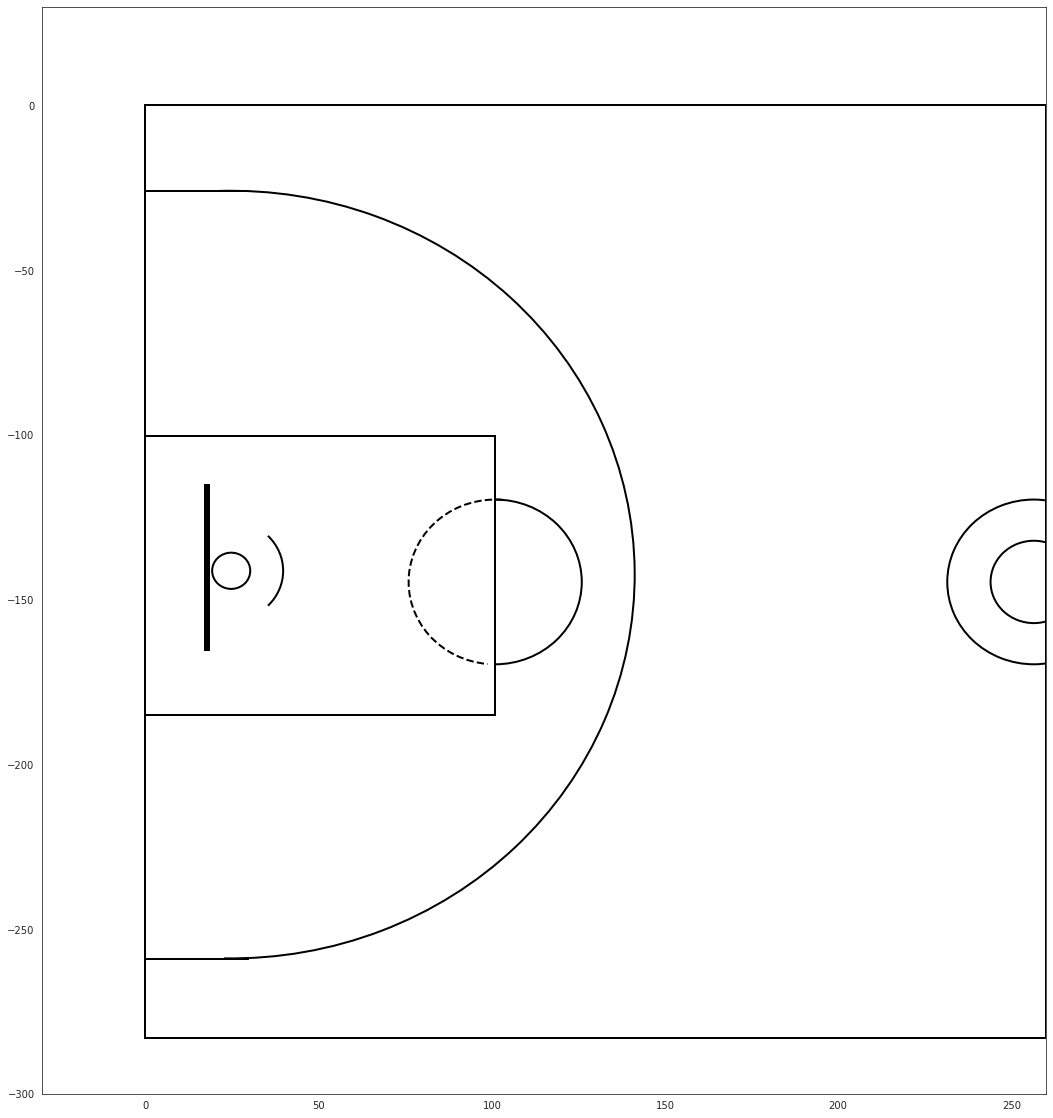

In [190]:
plt.figure(figsize=(18,20))
draw_court(outer_lines=True)
plt.xlim(-30,260)
plt.ylim(-300,30)
plt.show()

In [144]:
tiros = pd.read_csv("database_shots.csv")

In [145]:
tiros

,Unnamed: 0,name,jornada,shot,coord_x,coord_y
0,0,J. Zyskowski,2,#local-in,24.750000,126.416664
1,1,J. Zyskowski,2,#local-in,24.750000,23.883333
2,2,J. Zyskowski,2,#local-out,25.705345,23.883333
3,3,J. Zyskowski,2,#local-in,27.616035,137.866670
4,4,J. Zyskowski,2,#local-in,27.128998,129.816670
...,...,...,...,...,...,...
30399,31572,J. Dee,29,#visitor-out,32.850006,255.866670
30400,31573,J. Dee,29,#visitor-in,158.993040,67.750000
30401,31574,J. Dee,29,#visitor-out,161.147250,93.166664
30402,31575,J. Dee,29,#visitor-in,153.111110,222.383330


In [146]:
tiros["coord_x"] = pd.to_numeric(tiros["coord_x"], downcast="float")
tiros["coord_y"] = pd.to_numeric(tiros["coord_y"], downcast="float")
tiros["coord_y"] = tiros["coord_y"] * (-1)

In [147]:
jaycee = tiros[tiros["name"] == "J. Carroll"]

In [151]:
jaycee

,Unnamed: 0,name,jornada,shot,coord_x,coord_y
550,1061,J. Carroll,2,#local-out,132.291916,-220.383331
551,1062,J. Carroll,2,#local-out,110.787277,-240.250000
552,1063,J. Carroll,2,#local-in,38.799194,-259.549988
3129,6470,J. Carroll,7,#local-in,45.842525,-160.949997
3130,6471,J. Carroll,7,#local-out,24.750000,-258.433319
...,...,...,...,...,...,...
29428,29509,J. Carroll,28,#visitor-out,92.868164,-189.133331
29429,29510,J. Carroll,28,#visitor-in,36.652649,-143.800003
29430,29511,J. Carroll,28,#visitor-out,43.808380,-150.566666
29431,29512,J. Carroll,28,#visitor-out,145.281036,-216.666672


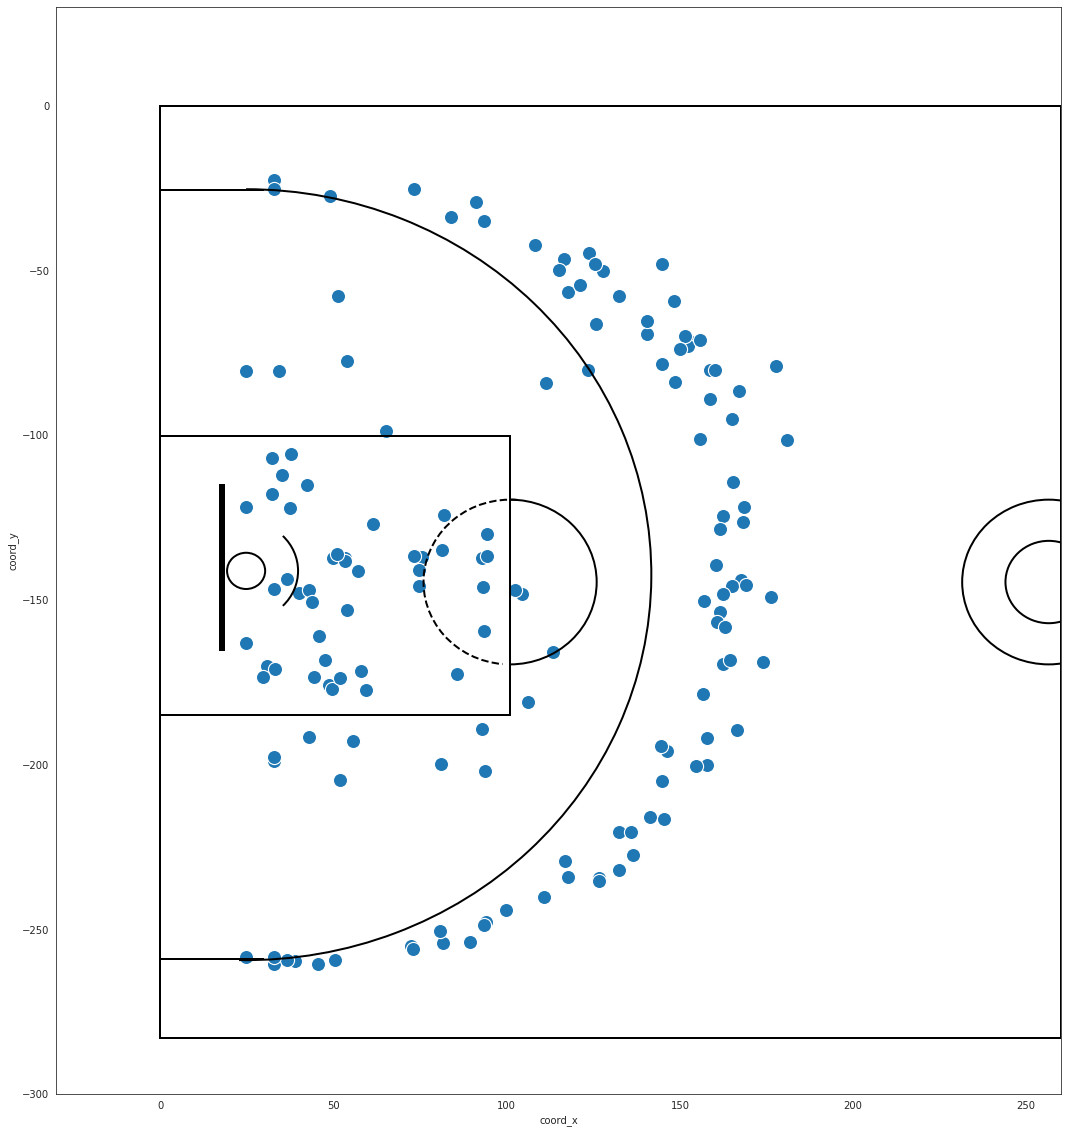

In [152]:
plt.figure(figsize=(18,20))
draw_court(outer_lines=True)
plt.xlim(-30,260)
plt.ylim(-300,30)
sns.scatterplot(data = jaycee, x = "coord_x", y = "coord_y", s = 200, markers = {"#local-in": "s", "#local-out": "X"})
plt.show()

In [ ]:
jaycee["col"] = 2 * df["col"]